In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("kag_risk_factors_cervical_cancer.csv", na_values="?")
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [5]:
data.shape

(858, 36)

We can see here that we have 858 entries with 36 columns

### Checking for null values

In [6]:
data.isnull().sum()/data.shape[0]*100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

In [7]:
data.duplicated().sum()

23

In [8]:
data["Biopsy"].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

0 means not cancer affected and 1 means cancer affected

<AxesSubplot:xlabel='Biopsy', ylabel='count'>

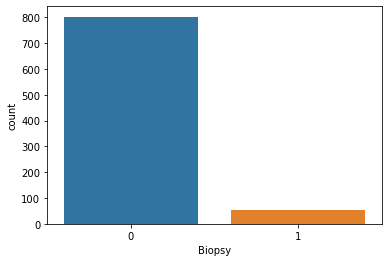

In [9]:
sns.countplot("Biopsy", data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

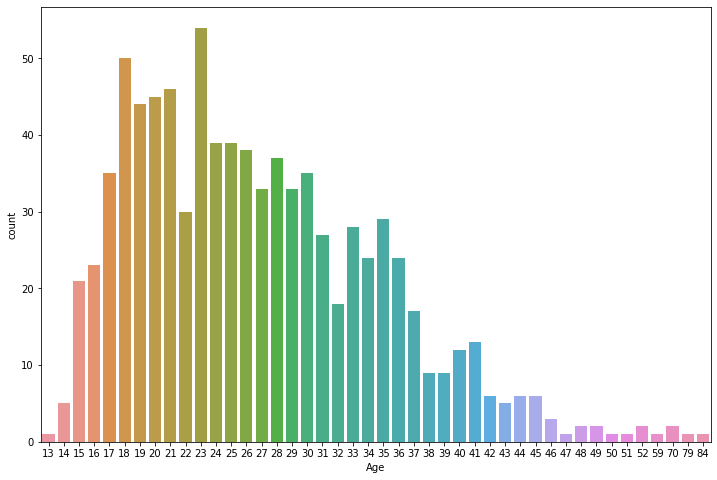

In [10]:
plt.figure(figsize = (12,8))
sns.countplot(x="Age", data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

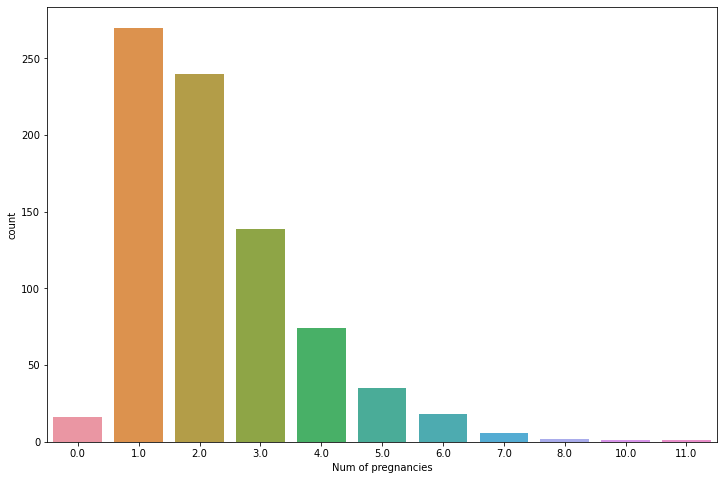

In [11]:
plt.figure(figsize = (12,8))
sns.countplot(x="Num of pregnancies", data=data)
plt.show

<AxesSubplot:xlabel='Smokes', ylabel='count'>

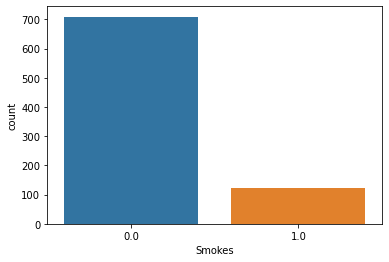

In [120]:
sns.countplot("Smokes", data=data)

In [12]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Treating missing values

We can see that the columns STDs: 'Time since first diagnosis' and 'STDs: Time since last diagnosis' have more than 90% of missing values so the columns will be dropped.

In [13]:
data.drop(["STDs: Time since first diagnosis","STDs: Time since last diagnosis"], axis=1, inplace=True)

In [14]:
data.shape

(858, 34)

In [15]:
#data["Number of sexual partners"].value_counts()

<AxesSubplot:xlabel='Number of sexual partners', ylabel='count'>

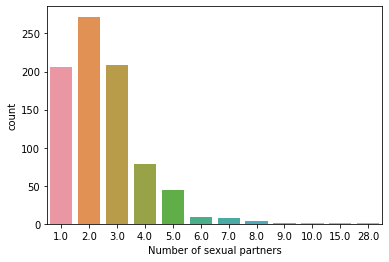

In [16]:
sns.countplot("Number of sexual partners", data=data)

In [17]:
data.pivot_table("Age","Biopsy")

,Age
Biopsy,
0,26.696139
1,28.636364


<AxesSubplot:xlabel='Number of sexual partners'>

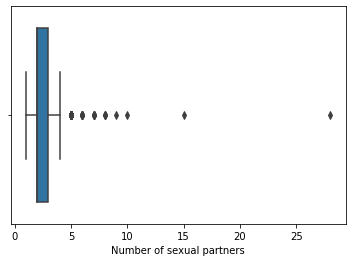

In [18]:
sns.boxplot("Number of sexual partners", data=data)

In [19]:
data["Number of sexual partners"].fillna(data["Number of sexual partners"].median(), inplace=True)
data["Number of sexual partners"].isnull().sum()

0

In [20]:
#data["Num of pregnancies"].value_counts()

In [21]:
#data["Number of sexual partners"].value_counts()

In [22]:
data["Number of sexual partners"]=data["Number of sexual partners"].astype("int")
data["Number of sexual partners"].isnull().sum()

0

In [23]:
data["Number of sexual partners"].dtype

dtype('int32')

In [24]:
data["Num of pregnancies"].fillna(data["Num of pregnancies"].median(), inplace=True)
data["Num of pregnancies"]=data["Num of pregnancies"].astype("int")

In [25]:
#data["Num of pregnancies"].value_counts()

In [26]:
data["Num of pregnancies"]=data["Num of pregnancies"].astype("int")

In [27]:
data["First sexual intercourse"].value_counts()

15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
22.0      9
23.0      9
26.0      7
27.0      6
24.0      6
12.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64

In [28]:
data["First sexual intercourse"].fillna(data["First sexual intercourse"].median(), inplace=True)

In [29]:
data["First sexual intercourse"].isnull().sum()

0

In [30]:
column=["First sexual intercourse", "Smokes", "Hormonal Contraceptives", "IUD", ""]

In [31]:
#data["Smokes"].value_counts()

In [32]:
data["Smokes"].fillna(data["Smokes"].mode()[0], inplace=True)
data["Smokes"].isnull().sum()

0

In [33]:
#data["Smokes"].value_counts()

In [34]:
#data["Smokes (years)"].value_counts()

In [35]:
data["Smokes (years)"].fillna(data["Smokes (years)"].median(), inplace=True)
data["Smokes (years)"].isnull().sum()

0

In [36]:
#data["Smokes (years)"].value_counts()

In [37]:
data.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [38]:
data["Smokes (packs/year)"].fillna(data["Smokes (packs/year)"].mean(), inplace=True)
data["Smokes (packs/year)"].isnull().sum()

0

In [39]:
#data["Hormonal Contraceptives"].value_counts()

In [40]:
data["Hormonal Contraceptives"].fillna(data["Hormonal Contraceptives"].mode()[0], inplace=True)
data["Hormonal Contraceptives"].isnull().sum()

0

In [41]:
#data["Hormonal Contraceptives (years)"].value_counts()

In [42]:
data["Hormonal Contraceptives (years)"].fillna(data["Hormonal Contraceptives (years)"].median(), inplace=True)
data["Hormonal Contraceptives (years)"].isnull().sum()

0

In [43]:
#data["IUD"].value_counts()

In [44]:
data["IUD"].fillna(data["IUD"].mode()[0], inplace=True)
data["IUD"].isnull().sum()

0

In [45]:
#data["IUD (years)"].value_counts()

In [46]:
data["IUD (years)"].fillna(data["IUD (years)"].median(), inplace=True)
data["IUD (years)"].isnull().sum()

0

In [47]:
#data["STDs"].value_counts()

In [48]:
data["STDs"].fillna(data["STDs"].mode()[0], inplace=True)
data["STDs"].isnull().sum()

0

In [49]:
#data["STDs (number)"].value_counts()

In [50]:
data["STDs (number)"].fillna(data["STDs (number)"].median(), inplace=True)
data["STDs (number)"].isnull().sum()

0

In [51]:
#data["STDs:condylomatosis"].value_counts()

In [52]:
data["STDs:condylomatosis"].fillna(data["STDs:condylomatosis"].mode()[0], inplace=True)
data["STDs:condylomatosis"].isnull().sum()

0

In [53]:
data["STDs:cervical condylomatosis"].value_counts()

0.0    753
Name: STDs:cervical condylomatosis, dtype: int64

In [54]:
data["STDs:cervical condylomatosis"].fillna(0, inplace=True)
data["STDs:cervical condylomatosis"].isnull().sum()

0

In [55]:
data.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [56]:
#data["STDs:vaginal condylomatosis"].value_counts()

In [57]:
data["STDs:vaginal condylomatosis"].fillna(data["STDs:vaginal condylomatosis"].mode()[0], inplace=True)
data["STDs:vaginal condylomatosis"].isnull().sum()

0

In [58]:
#data["STDs:vulvo-perineal condylomatosis"].value_counts()

In [59]:
data["STDs:vulvo-perineal condylomatosis"].fillna(data["STDs:vulvo-perineal condylomatosis"].mode()[0], inplace=True)
data["STDs:vulvo-perineal condylomatosis"].isnull().sum()

0

In [60]:
#data["STDs:syphilis"].value_counts()

In [61]:
data["STDs:syphilis"].fillna(data["STDs:syphilis"].mode()[0], inplace=True)
data["STDs:syphilis"].isnull().sum()

0

In [62]:
#data["STDs:pelvic inflammatory disease"].value_counts()

In [63]:
data["STDs:pelvic inflammatory disease"].fillna(data["STDs:pelvic inflammatory disease"].mode()[0], inplace=True)
data["STDs:pelvic inflammatory disease"].isnull().sum()

0

In [64]:
#data["STDs:genital herpes"].value_counts()

In [65]:
data["STDs:genital herpes"].fillna(data["STDs:genital herpes"].mode()[0], inplace=True)
data["STDs:genital herpes"].isnull().sum()

0

In [66]:
#data["STDs:molluscum contagiosum"].value_counts()

In [67]:
data["STDs:molluscum contagiosum"].fillna(data["STDs:molluscum contagiosum"].mode()[0], inplace=True)
data["STDs:molluscum contagiosum"].isnull().sum()

0

In [68]:
#data.isnull().sum()

In [69]:
#data["STDs:AIDS"].value_counts()

In [70]:
data["STDs:AIDS"].fillna(0, inplace=True)
data["STDs:AIDS"].isnull().sum()

0

In [71]:
#data["STDs:Hepatitis B"].value_counts()

In [72]:
data["STDs:Hepatitis B"].fillna(data["STDs:Hepatitis B"].mode()[0], inplace=True)
data["STDs:Hepatitis B"].isnull().sum()

0

In [73]:
#data["STDs:HPV"].value_counts()

In [74]:
data["STDs:HPV"].fillna(data["STDs:HPV"].mode()[0], inplace=True)
data["STDs:HPV"].isnull().sum()

0

In [75]:
#data.isnull().sum()

In [76]:
data["STDs:HIV"].value_counts()

0.0    735
1.0     18
Name: STDs:HIV, dtype: int64

In [77]:
data["STDs:HIV"].fillna(data["STDs:HIV"].mode()[0], inplace=True)
data["STDs:HIV"].isnull().sum()

0

In [78]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Dropping duplicate rows

In [79]:
data.drop_duplicates(keep="first", inplace=True)

In [80]:
data.duplicated().sum()

0

In [81]:
data_corr=data.corr()
data_corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070829,0.360080,0.516462,0.047035,0.214118,0.127846,0.006417,0.285616,0.275636,...,0.040227,-0.009607,0.108223,0.059664,0.099455,0.089581,-0.009720,0.100350,-0.019955,0.053661
Number of sexual partners,0.070829,1.000000,-0.153408,0.067286,0.232984,0.172758,0.174574,-0.009445,0.012689,0.027633,...,0.013719,0.049015,0.021602,0.015191,0.026591,0.022144,-0.042686,-0.015959,0.016060,-0.008875
First sexual intercourse,0.360080,-0.153408,1.000000,-0.068301,-0.129128,-0.061963,-0.059077,-0.023116,0.018370,-0.014292,...,0.034582,-0.016493,0.066469,-0.034037,0.042906,0.034366,-0.018873,0.003401,-0.009743,0.008179
Num of pregnancies,0.516462,0.067286,-0.068301,1.000000,0.074375,0.171764,0.093121,0.104740,0.210350,0.200165,...,-0.027329,0.029570,0.034415,-0.004646,0.046135,0.011020,0.034105,0.084999,-0.027916,0.040207
Smokes,0.047035,0.232984,-0.129128,0.074375,1.000000,0.722668,0.491713,-0.002216,0.036393,-0.059554,...,0.048704,0.087372,-0.015386,-0.043556,0.007889,-0.071784,0.030798,0.050366,-0.005460,0.027722
Smokes (years),0.214118,0.172758,-0.061963,0.171764,0.722668,1.000000,0.723195,-0.018800,0.048056,0.024540,...,0.050826,0.075832,0.051593,-0.031477,0.054136,-0.051876,0.068584,0.092735,-0.007916,0.060901
Smokes (packs/year),0.127846,0.174574,-0.059077,0.093121,0.491713,0.723195,1.000000,-0.001915,0.039677,0.006747,...,-0.008483,0.030392,0.107644,-0.021805,0.109536,-0.034484,0.025373,0.017003,0.004293,0.024233
Hormonal Contraceptives,0.006417,-0.009445,-0.023116,0.104740,-0.002216,-0.018800,-0.001915,1.000000,0.384773,-0.004883,...,0.032633,-0.068124,0.009261,-0.006089,0.027180,-0.010034,0.009444,-0.033415,-0.021443,-0.015339
Hormonal Contraceptives (years),0.285616,0.012689,0.018370,0.210350,0.036393,0.048056,0.039677,0.384773,1.000000,0.106649,...,0.053301,-0.032596,0.061169,0.002334,0.063851,-0.011614,0.048392,0.095889,0.083645,0.094524
IUD,0.275636,0.027633,-0.014292,0.200165,-0.059554,0.024540,0.006747,-0.004883,0.106649,1.000000,...,-0.016341,0.032933,0.115902,0.042733,0.060767,0.134328,0.050116,0.095230,0.012869,0.058820


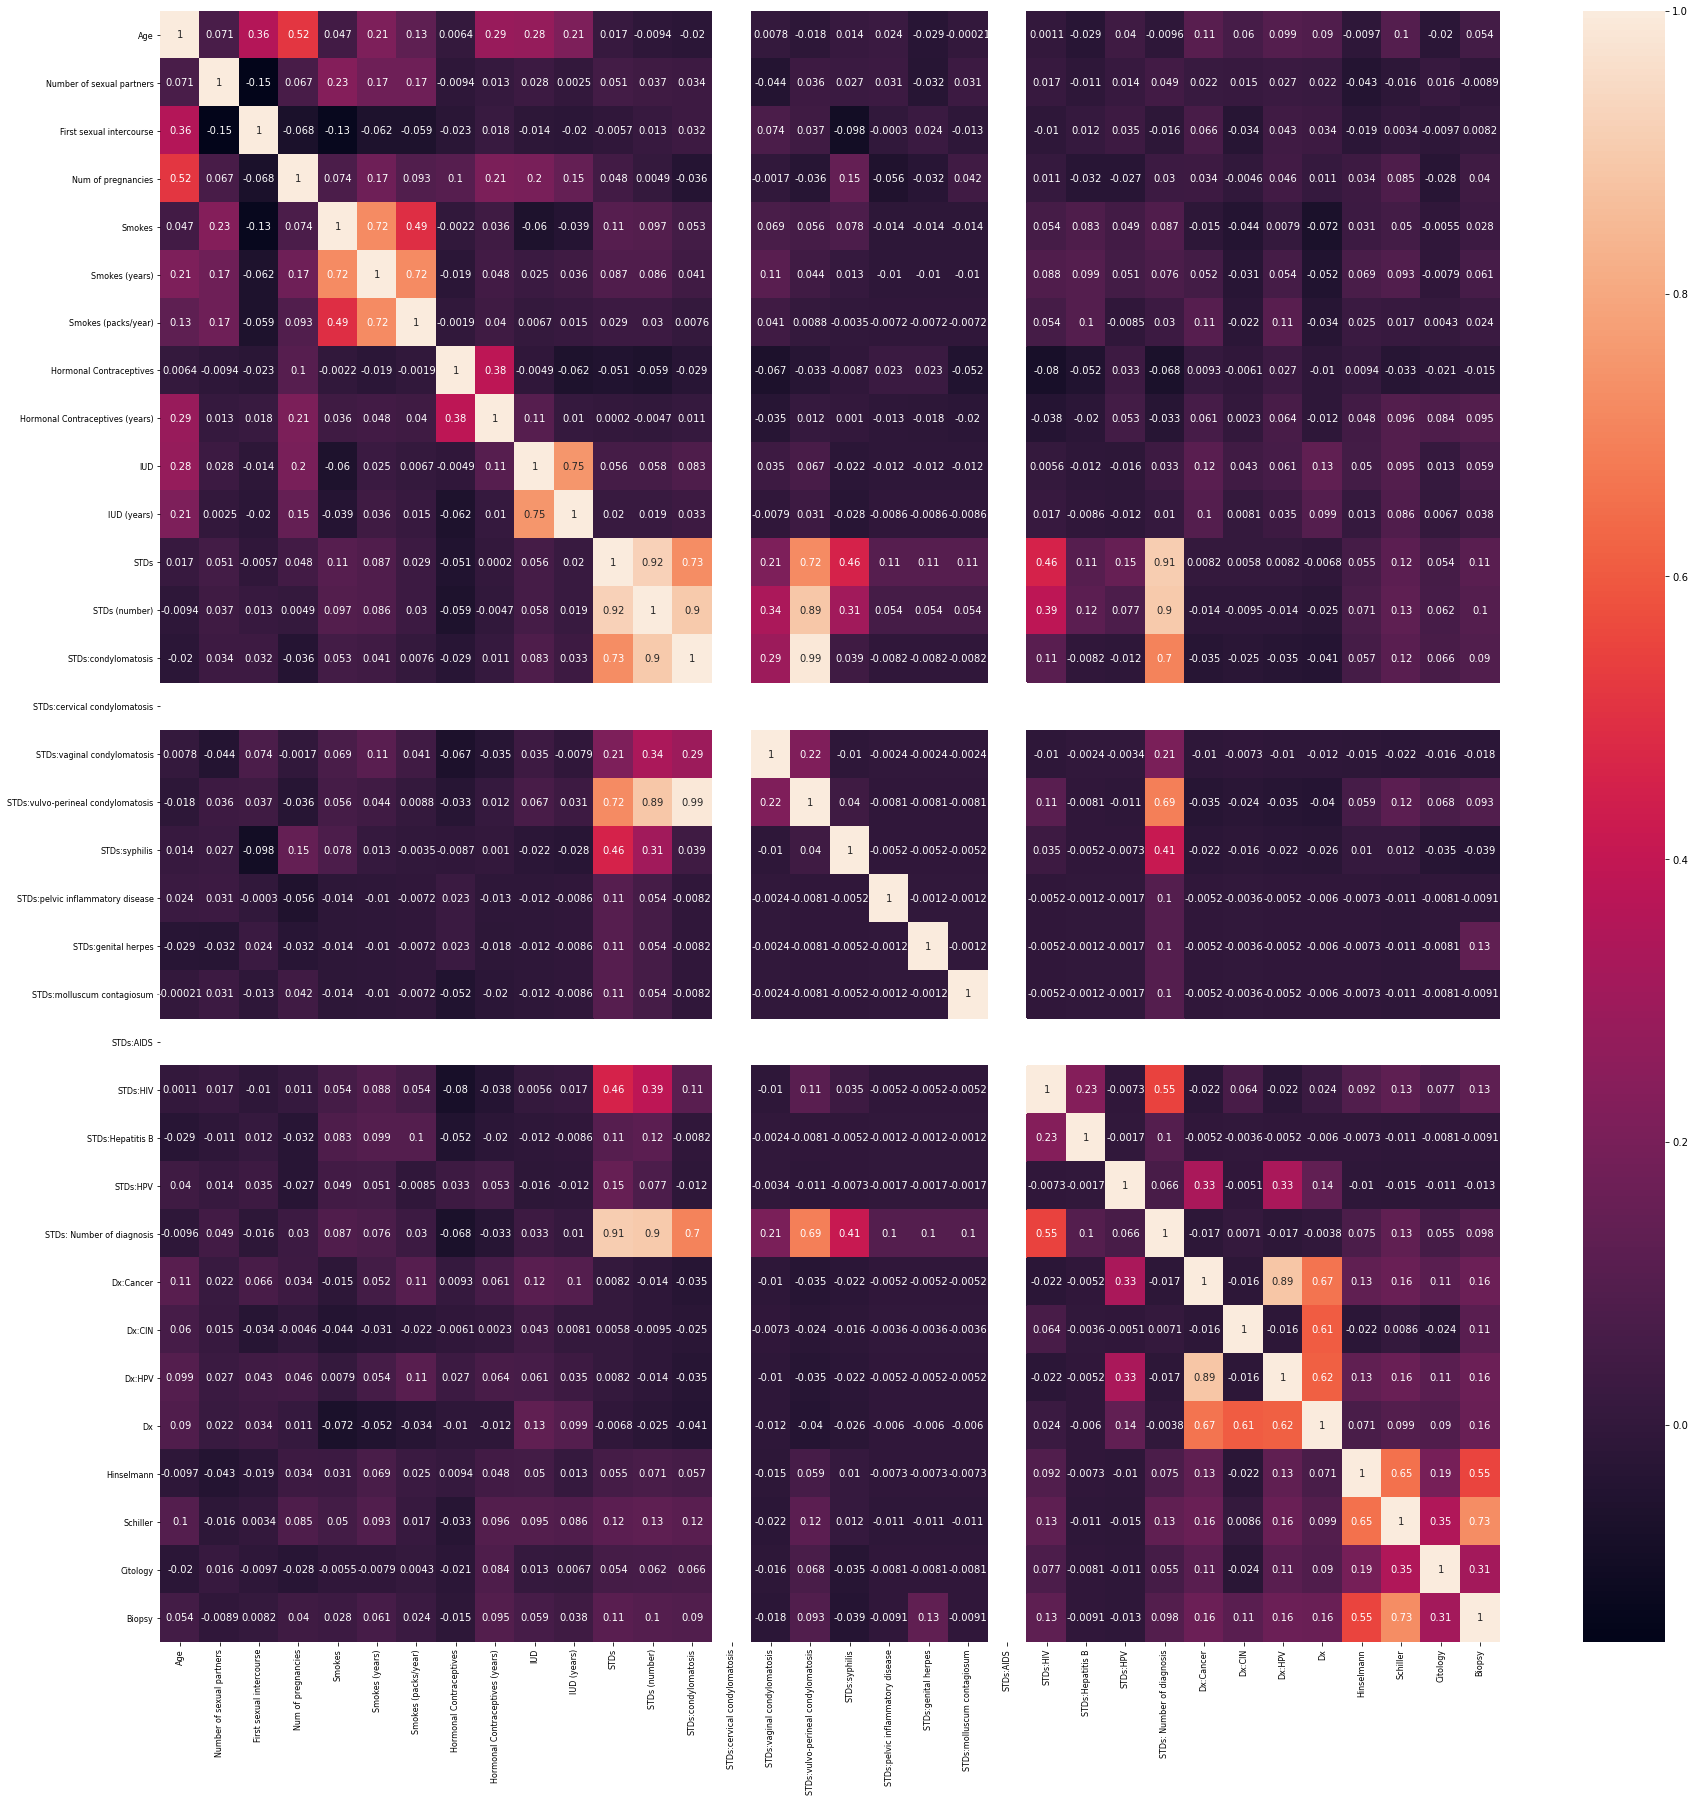

In [82]:
plt.figure(figsize = (30,30))
sns.heatmap(data_corr, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

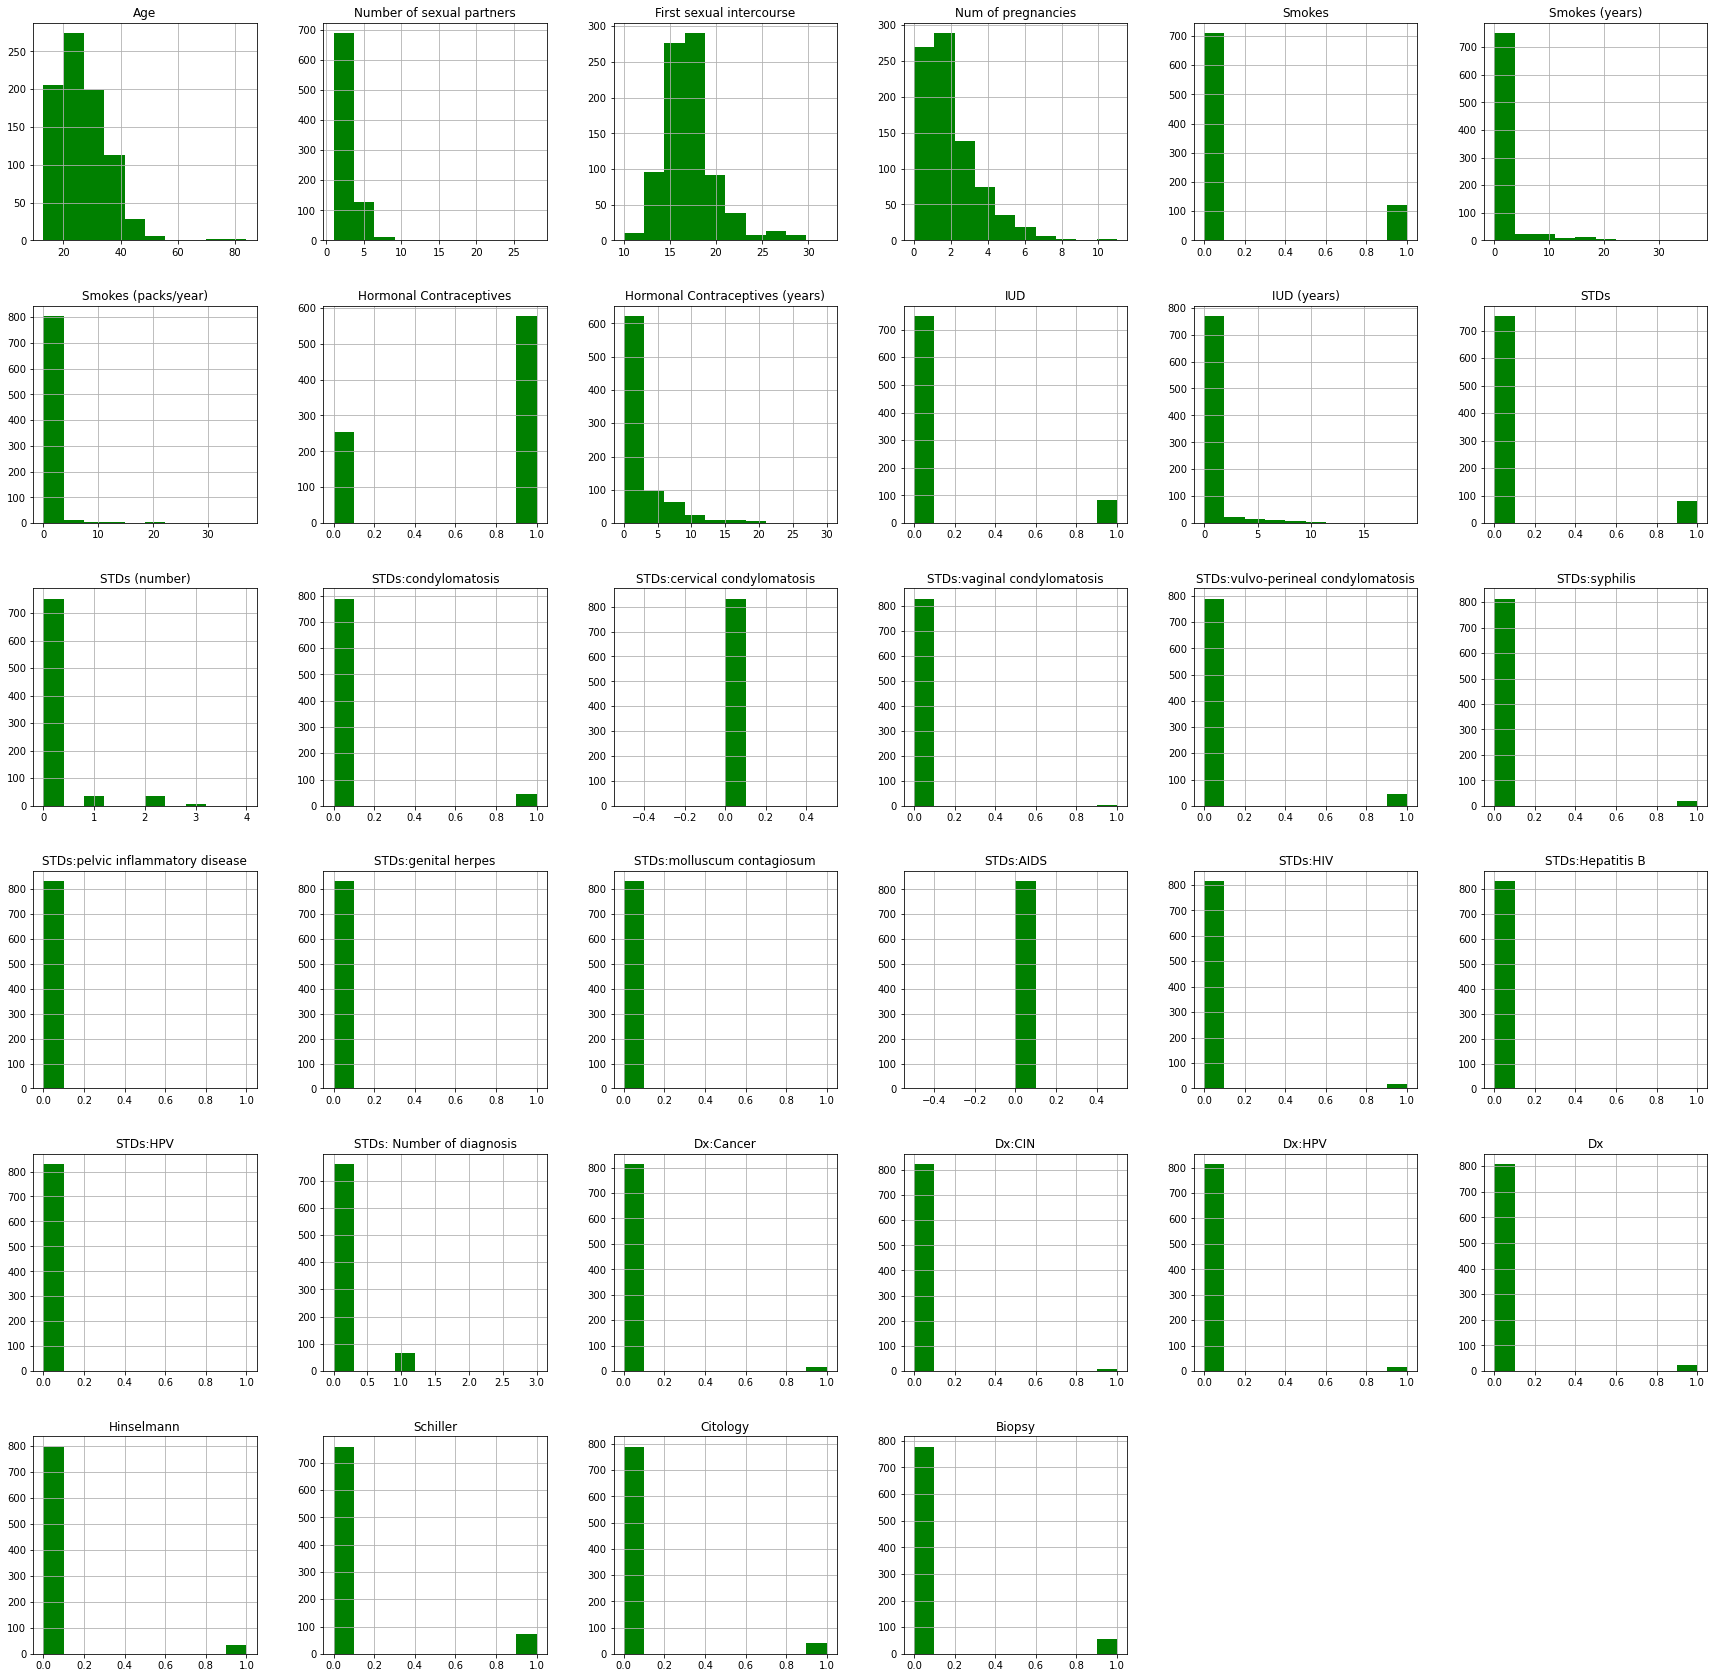

In [83]:
data.hist(bins = 10, figsize = (30,30), color='green')
plt.show()

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 832 non-null    int64  
 1   Number of sexual partners           832 non-null    int32  
 2   First sexual intercourse            832 non-null    float64
 3   Num of pregnancies                  832 non-null    int32  
 4   Smokes                              832 non-null    float64
 5   Smokes (years)                      832 non-null    float64
 6   Smokes (packs/year)                 832 non-null    float64
 7   Hormonal Contraceptives             832 non-null    float64
 8   Hormonal Contraceptives (years)     832 non-null    float64
 9   IUD                                 832 non-null    float64
 10  IUD (years)                         832 non-null    float64
 11  STDs                                832 non-n

In [85]:
X=data.drop("Biopsy", axis=1 )

In [86]:
y=data["Biopsy"]

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
num_components = 11
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

In [89]:
#pca.fit(X_scaled)

In [90]:
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance')
#plt.show()

In [91]:
#num_components = 11
#X_pca = pca.transform(X_scaled)[:, :num_components]

In [92]:
X_pca.shape

(832, 11)

In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=20)

In [95]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [96]:
lr.fit(X_train, y_train)

LogisticRegression()

In [97]:
print(cross_val_score(lr, X_train, y_train, cv=4))

[0.95970696 0.90073529 0.92279412 0.94117647]


In [98]:
y_pred=lr.predict(X_test)

In [99]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[225,  14],
       [ 15, 213]], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9379014989293362

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       239
           1       0.94      0.93      0.94       228

    accuracy                           0.94       467
   macro avg       0.94      0.94      0.94       467
weighted avg       0.94      0.94      0.94       467



In [104]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
print(cross_val_score(dt, X_train, y_train, cv=4))

[0.93406593 0.94485294 0.95955882 0.97794118]


In [106]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [107]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[233,   6],
       [  5, 223]], dtype=int64)

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       239
           1       0.97      0.98      0.98       228

    accuracy                           0.98       467
   macro avg       0.98      0.98      0.98       467
weighted avg       0.98      0.98      0.98       467



In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9764453961456103

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
print(cross_val_score(rf, X_train, y_train, cv=4))

[0.97069597 0.95588235 0.96323529 0.98529412]


In [113]:
y_pred=rf.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9678800856531049

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [116]:
print(cross_val_score(knn, X_train, y_train, cv=4))

[0.96703297 0.91544118 0.95588235 0.96323529]


In [117]:
y_pred=knn.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9571734475374732

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       239
           1       0.92      1.00      0.96       228

    accuracy                           0.96       467
   macro avg       0.96      0.96      0.96       467
weighted avg       0.96      0.96      0.96       467

